# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 Analyse the relationship between the variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set
data = pd.read_csv("ames.csv")
data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Return the number of rows and columns of the DataFrame
data.shape

(2930, 14)

In [4]:
# Clean and pre-process the data if neccessary
# Get the number of missing data values per column
missing_values_count = data.isnull().sum()
# Look at the number of missing values in the columns
missing_values_count[0:15]

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

In [5]:
data['Year_Built'] = pd.to_datetime(data['Year_Built'], format= '%Y').dt.year
data['Year_Remod_Add'] = pd.to_datetime(data['Year_Remod_Add'], format= '%Y').dt.year
print(data['Year_Built'].head())
print(data['Year_Remod_Add'].head())



0    1960
1    1961
2    1958
3    1968
4    1997
Name: Year_Built, dtype: int32
0    1960
1    1961
2    1958
3    1968
4    1998
Name: Year_Remod_Add, dtype: int32


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int32
 1   Year_Remod_Add  2930 non-null   int32
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int32(2), int64(12)
memory usage: 297.7 KB


**Information about the data**

In [7]:
data.describe()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1984.266553,1051.255631,1159.557679,335.455973,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,472.658362,180796.060068
std,30.245361,20.860286,440.968018,391.890885,428.395715,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,215.187196,79886.692357
min,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,1301.500000,1384.000000,703.750000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,213500.000000
max,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1488.000000,755000.000000


**Correlation matrices of all data**

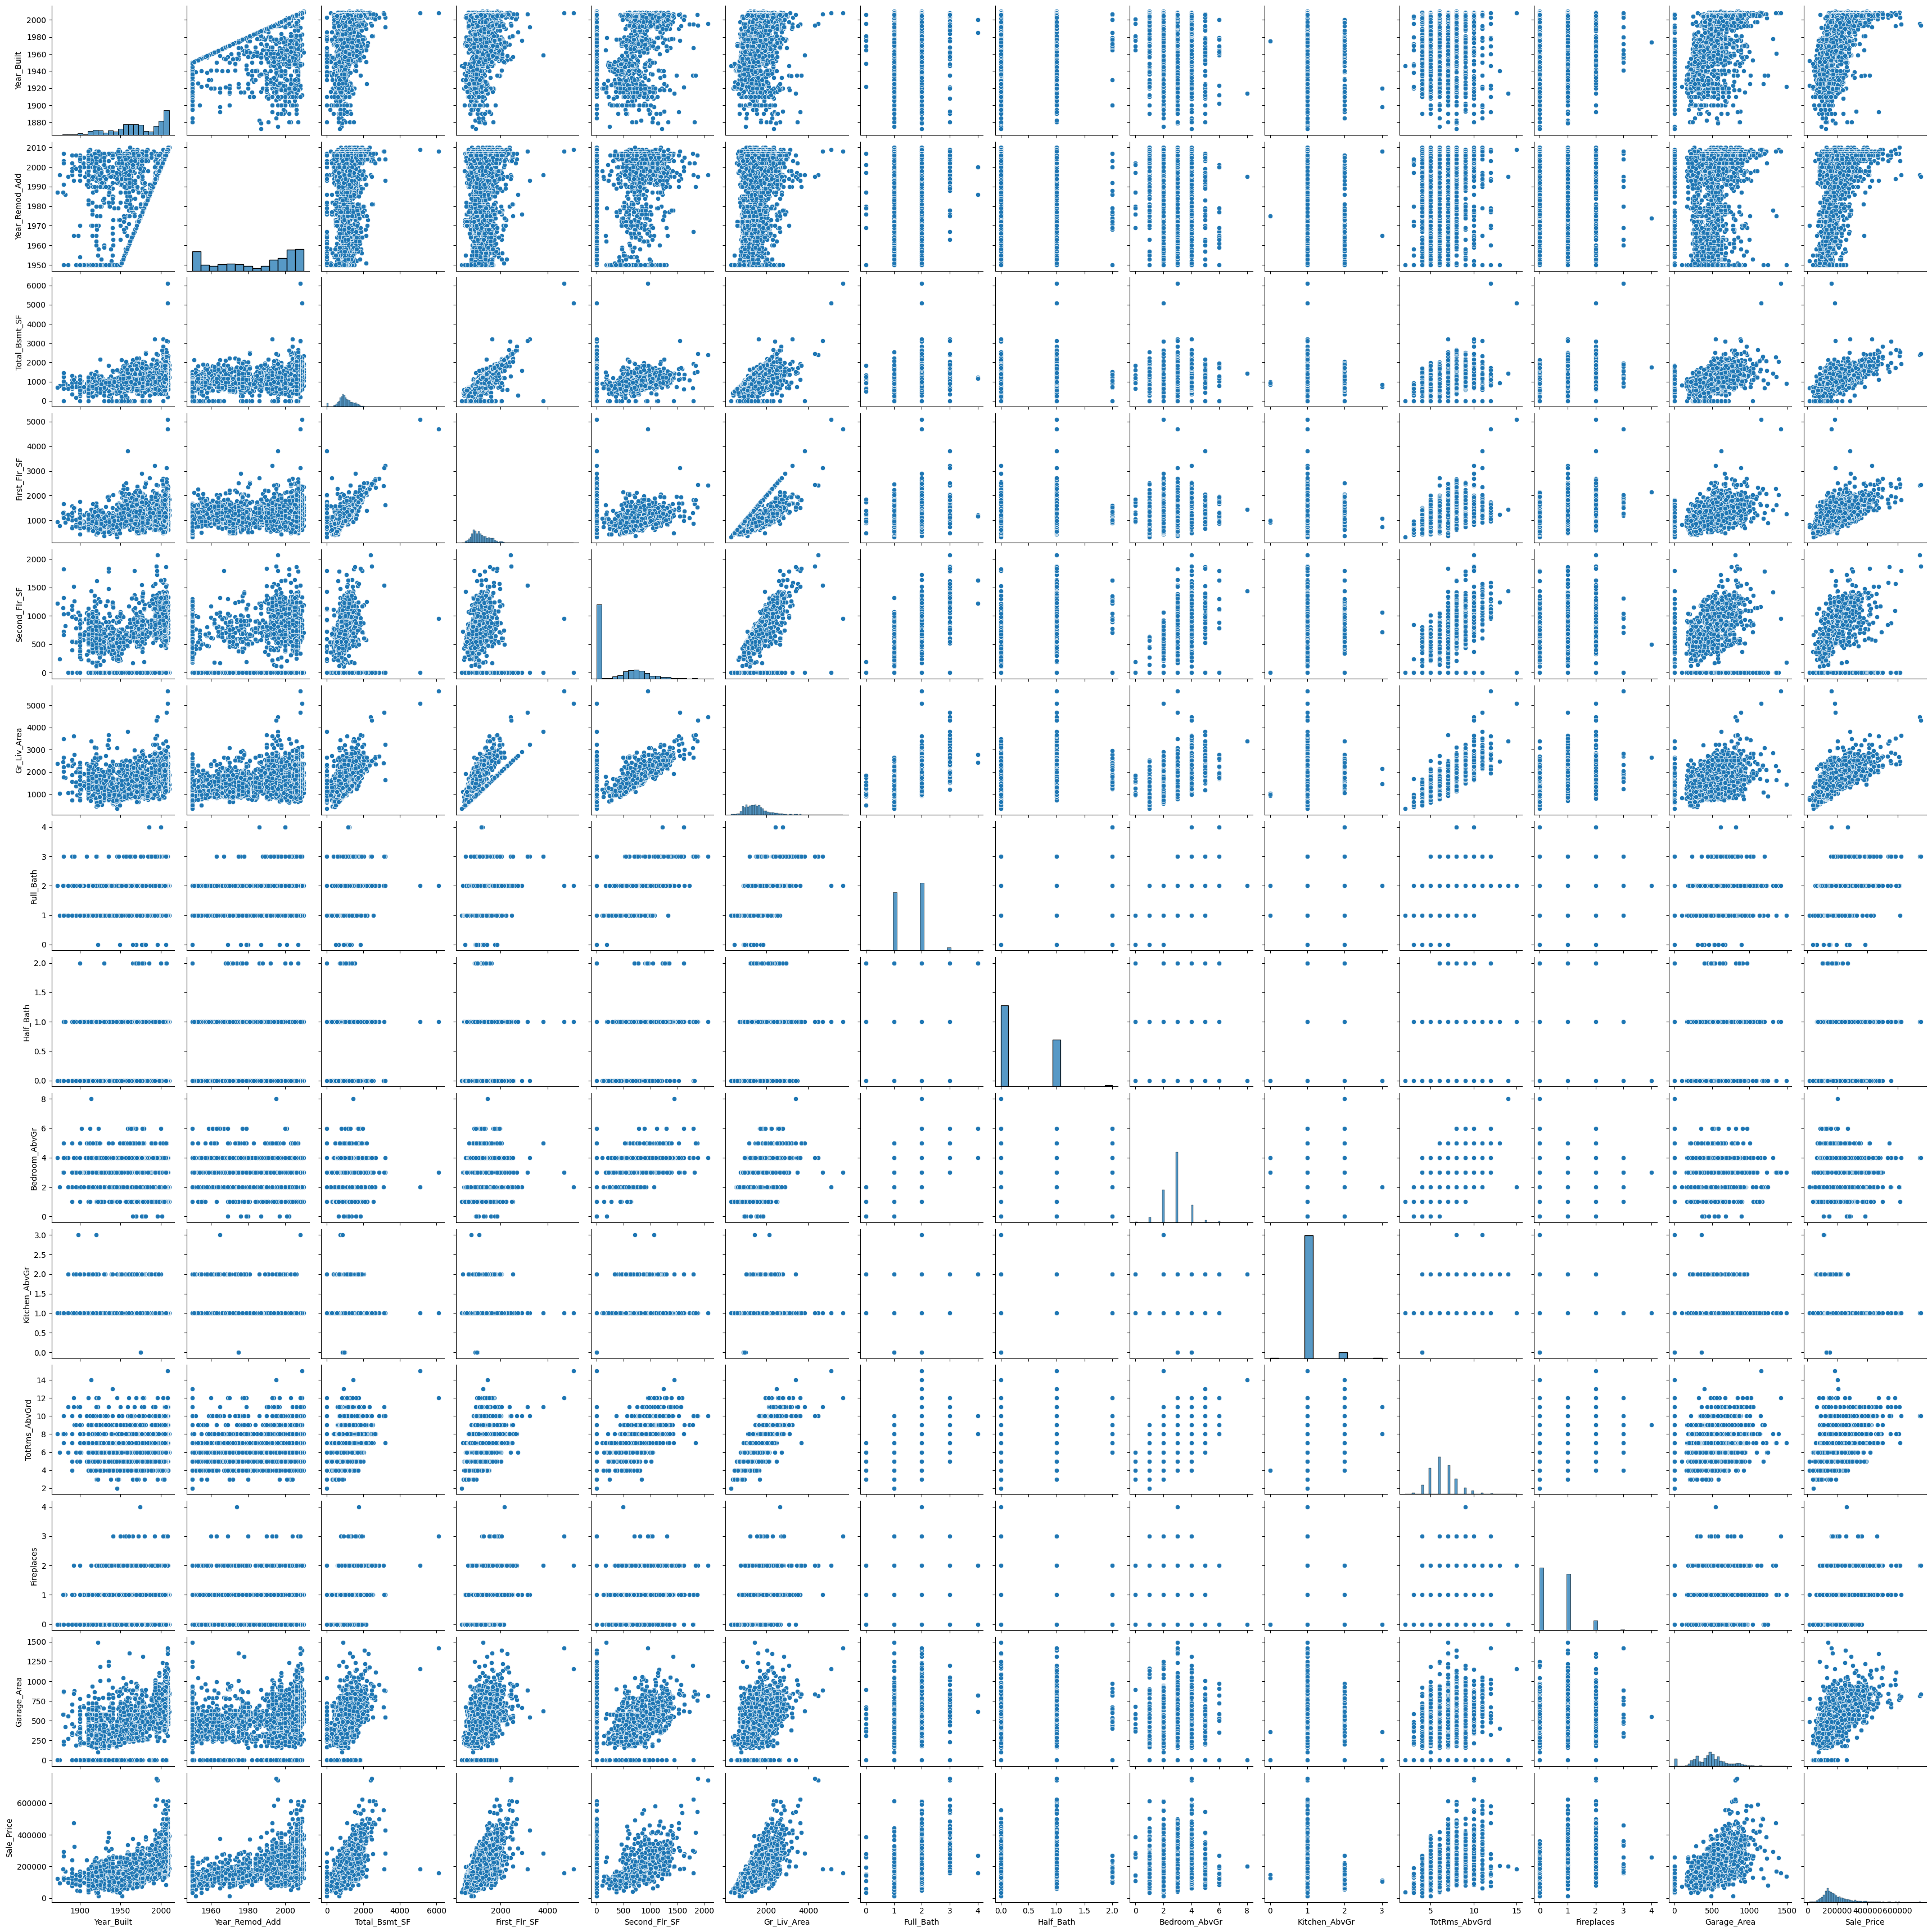

In [8]:
# Explore the data with visualisations such as histograms and correlation matrices
sns.pairplot(data=data)

**Correlation matrices of filtered data**  
Filtered for:
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars

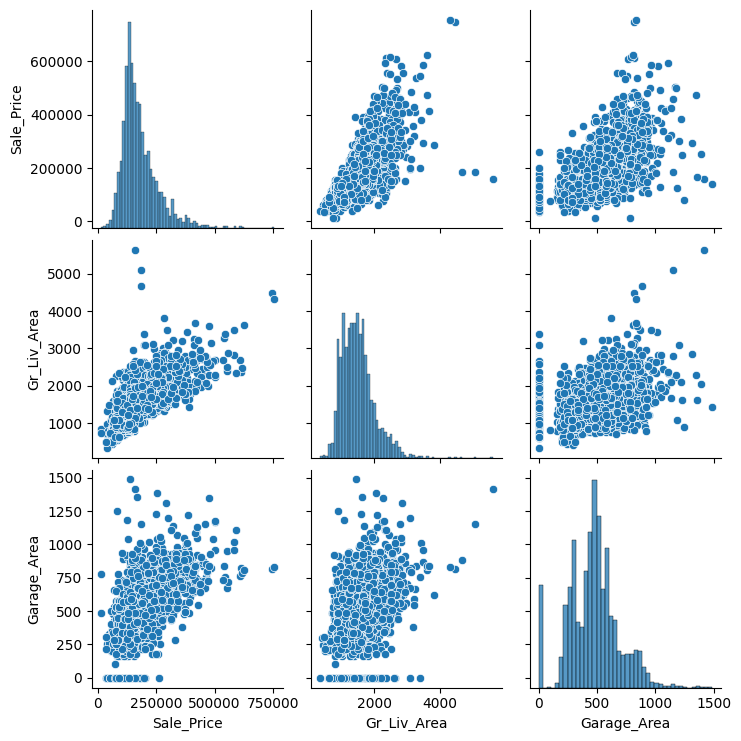

In [9]:
# Pairplot (Filtered)
selected_columns = ['Sale_Price', 'Gr_Liv_Area', 'Garage_Area']
sns.pairplot(data=data[selected_columns])

**Investigate living area outliers**

In [10]:
# Sort data by Gr_Liv_Area (descending)
data.sort_values(by='Gr_Liv_Area', ascending=False).head(10)

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
1498,2008,2008,6110,4692,950,5642,2,1,3,1,12,3,1418,160000
2180,2008,2009,5095,5095,0,5095,2,1,2,1,15,2,1154,183850
2181,2007,2008,3138,3138,1538,4676,3,1,3,1,11,1,884,184750
1760,1996,1996,2396,2411,2065,4476,3,1,4,1,10,2,813,745000
1767,1994,1995,2444,2444,1872,4316,3,1,4,1,10,2,832,755000
1497,1959,1996,0,3820,0,3820,3,1,5,1,11,2,624,284700
2737,1935,1990,1836,1836,1836,3672,3,1,5,1,7,2,836,415000
2445,1995,1996,1930,1831,1796,3627,3,1,4,1,10,1,807,625000
2666,1892,1993,1107,1518,1518,3608,2,1,4,1,12,2,840,475000
2450,1993,1994,1733,1933,1567,3500,3,1,4,1,11,1,959,584500


In [11]:
# Split the independent variables from the dependent variable using Gr_Liv_Area and Garage_Area
X = data.iloc[:,[5, 12]].values
X[0:10]

array([[1656,  528],
       [ 896,  730],
       [1329,  312],
       [2110,  522],
       [1629,  482],
       [1604,  470],
       [1338,  582],
       [1280,  506],
       [1616,  608],
       [1804,  442]])

**Scatterplot comparing:**  
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars

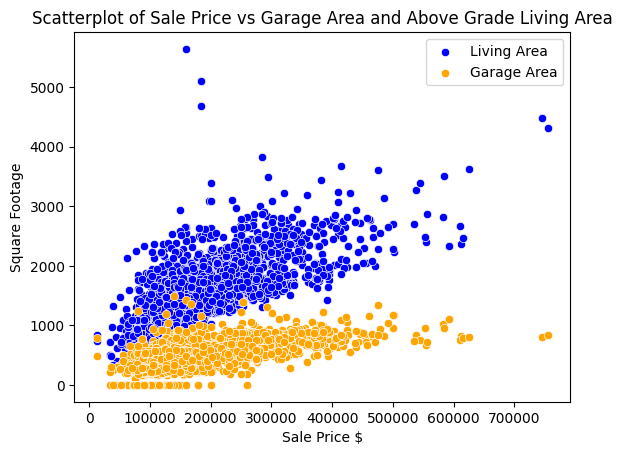

In [12]:
# Explore relationships between the independent and dependent variables (Filtered)

sns.scatterplot(data=data, x='Sale_Price', y='Gr_Liv_Area', color='blue', label='Living Area')
sns.scatterplot(data=data, x='Sale_Price', y='Garage_Area', color='orange', label='Garage Area')

# Add labels and title
plt.xlabel('Sale Price $')
plt.ylabel('Square Footage')
plt.title('Scatterplot of Sale Price vs Garage Area and Above Grade Living Area')
plt.legend()
plt.show()

In [13]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Select and reshape data
y = data.iloc[:,13].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
sales_model = LinearRegression()

# Create the model using fit(X,y)
sales_model.fit(X,y)

LinearRegression()

In [14]:
# Create a training and test set with a 75:25 split ratio
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed, shuffle=True,)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


In [15]:
# Print the model intercept and coefficients
print('Intercept: \n', sales_model.intercept_)
print('Coefficients: \n', sales_model.coef_)

Intercept: 
 [-10365.25158597]
Coefficients: 
 [[ 81.92294905 144.50658946]]


In [16]:
# Standardise data
# Fit the scaler on training set
sc = StandardScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit a linear regression model
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [17]:
# Generate predictions for the test set
predictions = lr.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lr.predict(X_line)

**Root Mean Squared Error (RMSE)**

In [18]:
# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): ${round(rmse, 2)}")
print(f"\nRMSE as a percent of the average: {round((rmse/180796.06)*100)}%")
print(f"\nRMSE vs. standard deviation: {round((rmse/79886.69)*100)}%")



Root Mean Squared Error (RMSE): $51326.13

RMSE as a percent of the average: 28%

RMSE vs. standard deviation: 64%


**Linear regression model**

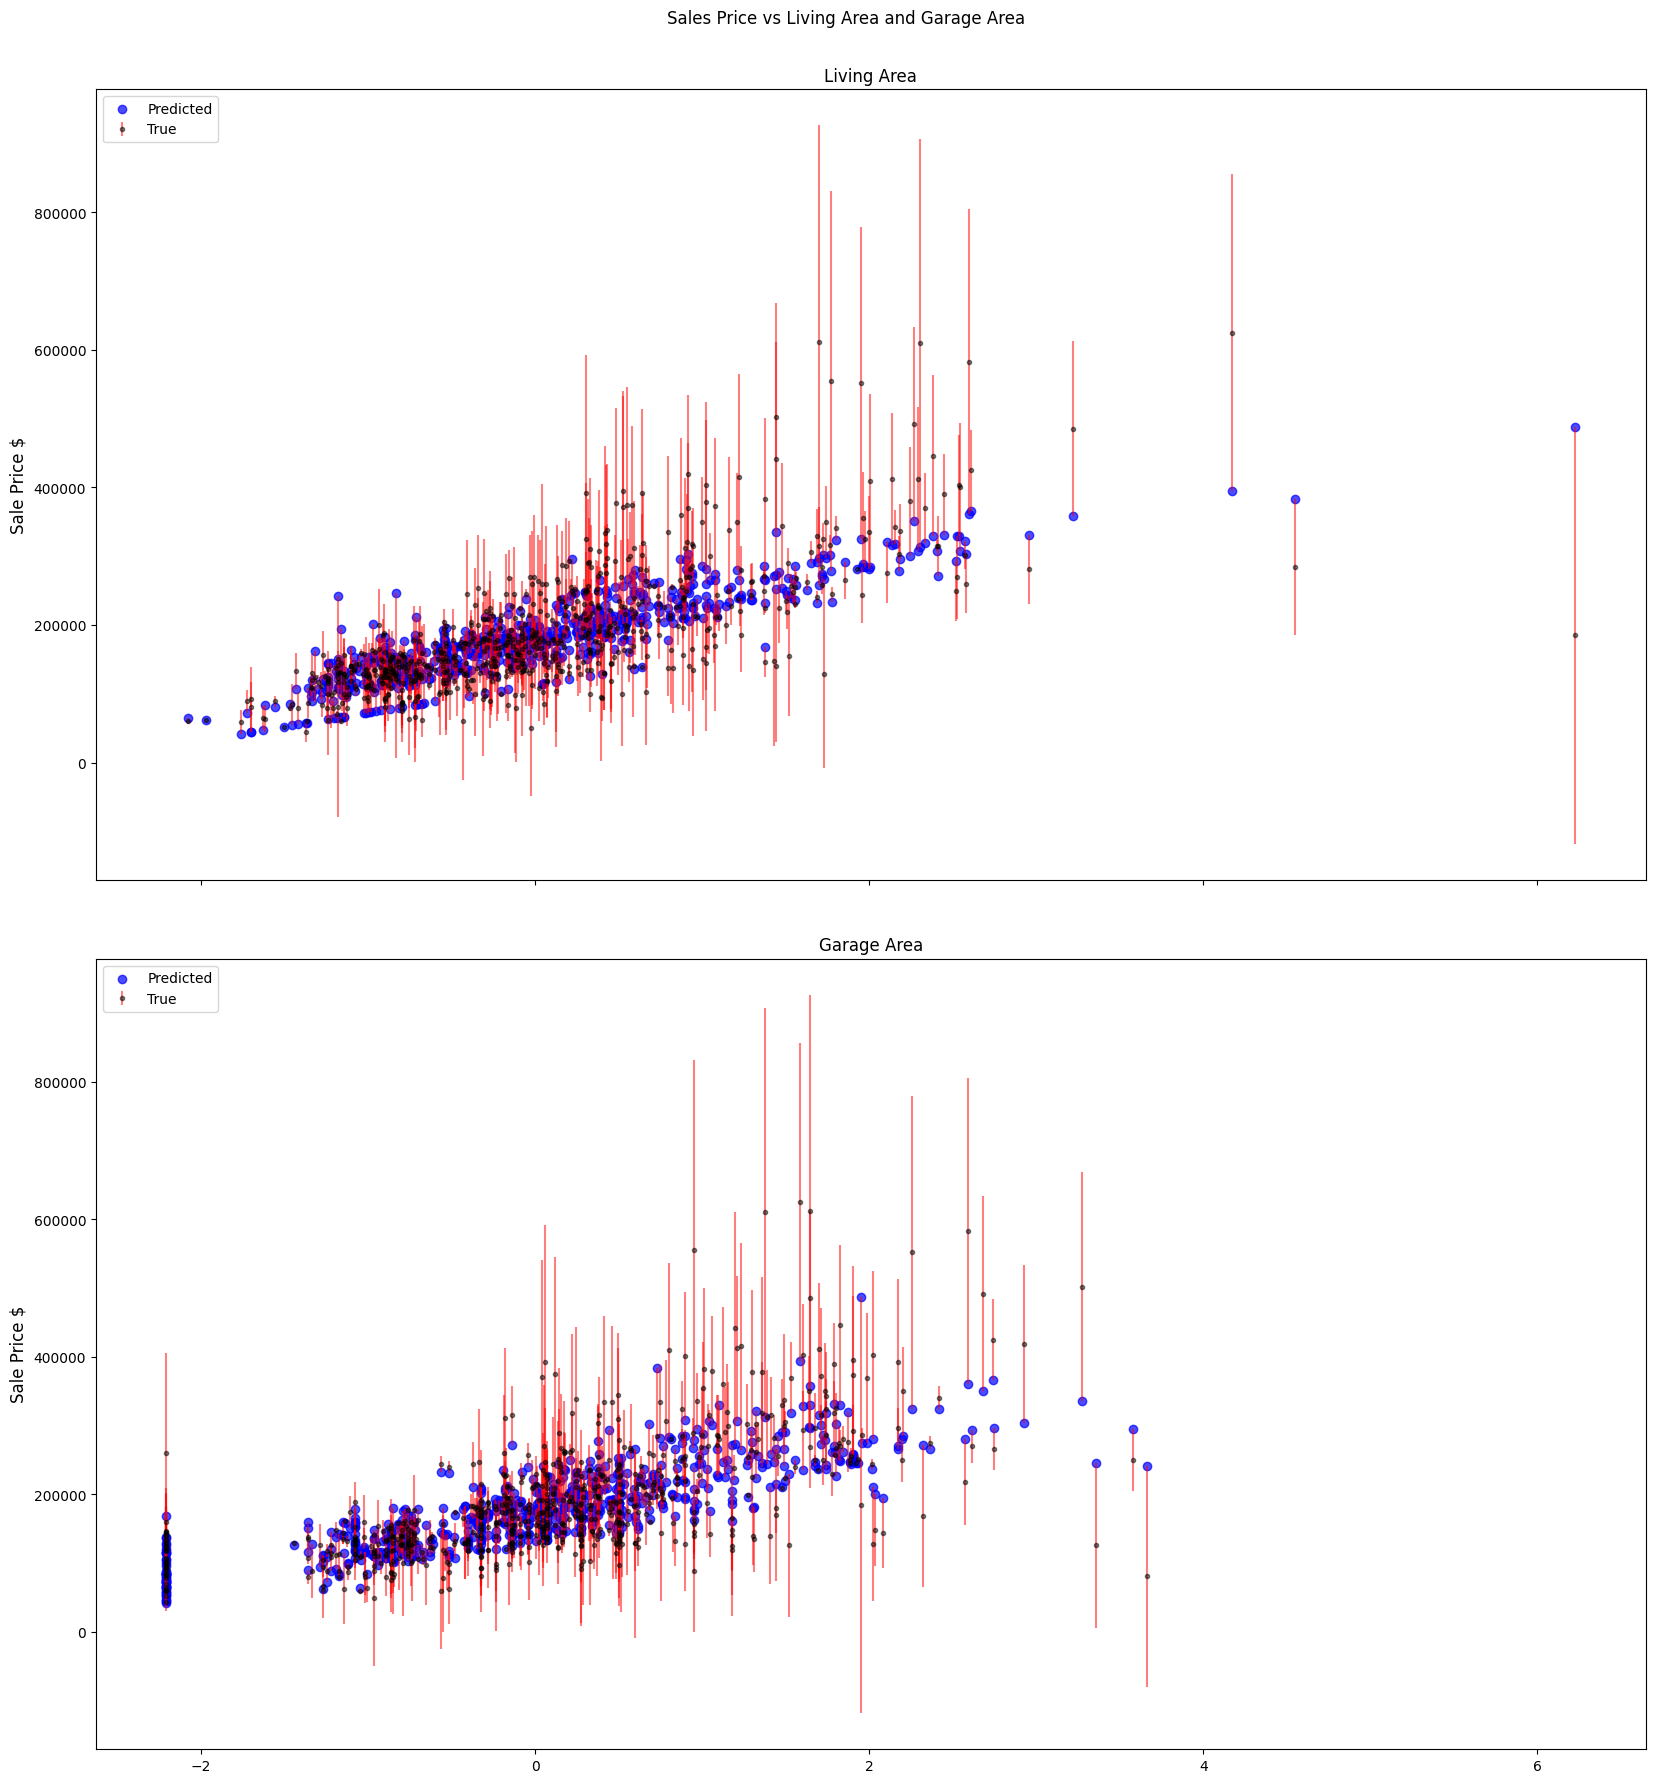

In [19]:
# Generate a plot
num_features = X_test.shape[1]

# Set plots per row
rows = (num_features // 1) + (num_features % 1 > 0)
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1, top=0.94)
fig.suptitle("Sales Price vs Living Area and Garage Area")

# Flatten the axes array for iteration
ax = ax.flatten()

# Get values for the error bar
error_bar_values = np.abs((y_test - predictions)[:, 0])

# Plot data, predicted values, and error bars
for i in range(num_features):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', alpha=0.5, label='True')
    ax[i].scatter(X_test[:, i], predictions[:, 0], c='b', alpha=0.7, marker='o', label='Predicted')
    ax[i].set_ylabel("Sale Price $", fontsize=12)
    ax[i].legend(loc='upper left', fontsize=10)

ax[0].set_title("Living Area")
ax[1].set_title("Garage Area")

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.show()

In [20]:
# Print the coefficients
print('Coefficients: \n', sales_model.coef_)

Coefficients: 
 [[ 81.92294905 144.50658946]]


**Interpret coefficients in the context of the prediction:**

The coefficients show the independent variables have a positive impact on sale price. The coefficients indicate that increases in area of the garage increases the value of a house more than the living area.

**Summarise findings**  

Analysis of the data showed that there were no NaN values and that all data was provided as an integer, and therefore there was no cleansing required. Although Year_Built and Year_Remod_Add could be converted to date time format, when doing this it removes that information from the correlation matrices and therefore I used the .dt.year to convert it back to int.

The correlation matrices showed the living area and garage area features followed a Gaussian distribution, therefore standardisation was used.

The scatterplot showed the data followed a relatively linear pattern. It may be helpful to remove some of the outliers from the data. For example, there are three extreme outlier in living area where the properties have the largest living area, but the sales prices were much lower. This is likely due to other factors. Having investigated these further, if the houses were sold shortly after they were built or remodelled this coincides with the financial crisis that started in late 2007 to mid-2009* and affected house sales prices significantly. These outliers would skew the data.

Using the Root Mean Squared Error provides the measure in the same scale as the dependent variable (the sales price) and we can see that the predictions deviate by approximately $51,326.13 on average compared to the sale prices. With a standard deviation of $79,886.69, the RMSE shows the model performs better (64%) than using the average sale price as a measure.
Compared to the average sales price of $180796.06 this shows a typical prediction error of 28% which is relatively high to depend on this data alone.

In addition to removing some of the outliers it would be beneficial to investigate the impact of other independent variables to provide better predictions. In a separate worksheet (which I included in the folder) I compared all the independent variables which provided a lower RMSE of $38,362.19. Compared to the average sales price this shows a typical prediction error of 21% and still performs 48% better than using the average sales price as a measure.

\* https://www.google.co.uk/search?q=2008%2F2009+Financial+crash&ie=UTF-8&oe=
